<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:#ffff99;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Logistic Regression From Scratch </h1></center>    

</div>

In [26]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py
import copy

**General Architecture of the learning algorithm**

We will build a Logistic Regression, using a Neural Network mindset. Logistic Regression is actually a very simple Neural Network

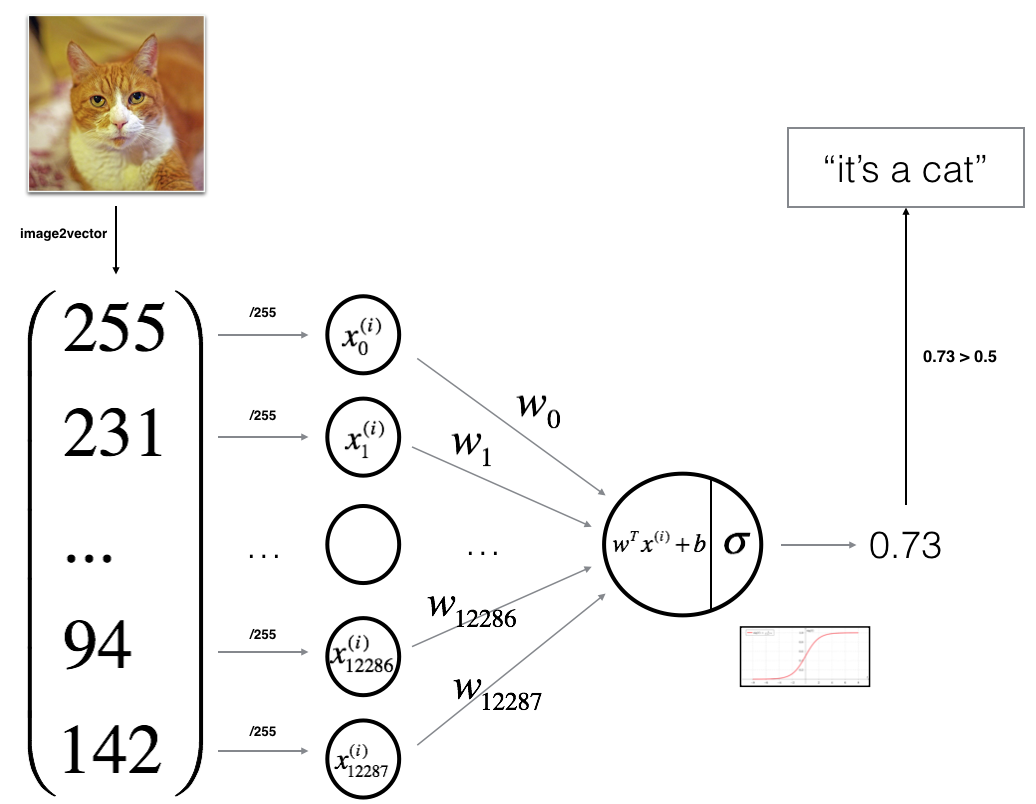

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

We will carry out the following steps: 

  - Initialize the parameters of the model
  - Learn the parameters for the model by minimizing the cost  
  - Use the learned parameters to make predictions (on the test set)
  - Analyse the results

As you've seen, we need to compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions.

In [23]:
#Sigmoid function for activation
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))
    
    return s

**Initializing parameters:**

We will implement parameter initialization. You have to initialize w as a vector of zeros and b as a scaler of zero.

In [24]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    w = np.zeros((dim,1))
    b = 0.0
    
    return w, b

**Forward and Backward propagation:**

Now that our parameters are initialized, we can do the "forward" and "backward" propagation steps for learning the parameters.

We will implement a function `propagate()` that computes the cost function and its gradient.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas we will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [25]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    m = X.shape[1]

    #FORWARD PROPAGATION (FROM X TO COST)

    #Compute activation
    A = sigmoid(np.dot(w.T,X)+b)
    #Compute cost
    cost = (-1/m)*np.sum(Y*(np.log(A))+(1-Y)*(np.log(1-A)))
    
    # BACKWARD PROPAGATION (TO FIND GRAD)

    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    cost = np.squeeze(np.array(cost))

    grads = {'dw': dw, 'db': db}
    
    return grads, cost

**Optimization:**

The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [27]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
         
        #Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
                
        #Retrieve derivatives from grads
        dw = grads['dw']
        db = grads['db']
        
        #Update rule    
        w = w - learning_rate*dw
        b = b - learning_rate*db
                
        #Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            #Print the cost every 100 training iterations
            if print_cost:
                print('Cost after iteration %i: %f' %(i, cost))
    
    params = {'w': w, 'b': b}
    
    grads = {'dw': dw, 'db': db}
    
    return params, grads, costs

**Predict:**

To implement the `predict()` function, there are two steps to compute predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. 

In [28]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture    
    A = sigmoid(np.dot(w.T,X)+b)
        
    for i in range(A.shape[1]):
        if A[0,i] >= 0.5:
            Y_prediction[0,i] = 1 
        else:
            Y_prediction[0,i] = 0    
            
    return Y_prediction

**Merge all functions into a model:**

In [29]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """    
    #Initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
    #Gradient descent 
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    #Retrieve parameters w and b from dictionary "params"
    w = params['w']
    b = params['b']
    #Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    if print_cost:
        print('train accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print('test accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {'costs': costs,
         'Y_prediction_test': Y_prediction_test, 
         'Y_prediction_train' : Y_prediction_train, 
         'w' : w, 
         'b' : b,
         'learning_rate' : learning_rate,
         'num_iterations': num_iterations}
    
    return d

**Overview of the Problem set:**

We are given a dataset containing: 
- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat 
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

We will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

In [8]:
#Loading the data (cat/non-cat)
def load_dataset():
    train_dataset = h5py.File('./train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset['train_set_x'][:]) # your train set features
    train_set_y_orig = np.array(train_dataset['train_set_y'][:]) # your train set labels

    test_dataset = h5py.File('./test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset['test_set_x'][:]) # your test set features
    test_set_y_orig = np.array(test_dataset['test_set_y'][:]) # your test set labels

    classes = np.array(test_dataset['list_classes'][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()    

y = [1], it's a 'cat' picture.


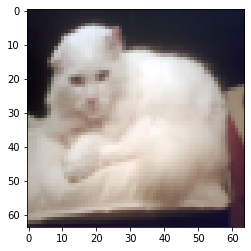

In [14]:
#Example of a picture
index = 13
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

**Preprocessing:**

In [17]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print ('Number of training examples: m_train = ' + str(m_train))
print ('Number of testing examples: m_test = ' + str(m_test))
print ('Height/Width of each image: num_px = ' + str(num_px))
print ('Each image is of size: (' + str(num_px) + ', ' + str(num_px) + ', 3)')
print ('train_set_x shape: ' + str(train_set_x_orig.shape))
print ('train_set_y shape: ' + str(train_set_y.shape))
print ('test_set_x shape: ' + str(test_set_x_orig.shape))
print ('test_set_y shape: ' + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


For convenience, we should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px  ∗  num_px  ∗  3, 1). After this, our training and test dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

When you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b ∗ c ∗ d, a) is to use: X.reshape(X.shape[0], -1).T

In [20]:
#Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ('train_set_x_flatten shape: ' + str(train_set_x_flatten.shape))
print ('train_set_y shape: ' + str(train_set_y.shape))
print ('test_set_x_flatten shape: ' + str(test_set_x_flatten.shape))
print ('test_set_y shape: ' + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

In [21]:
#Standardize the dataset
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [30]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a 'cat' picture.


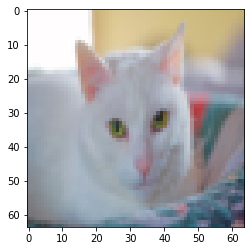

In [33]:
#Example of a prediction
index = 2
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ('y = ' + str(test_set_y[0,index]) + ', you predicted that it is a \'' + 
       classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  '\' picture.')

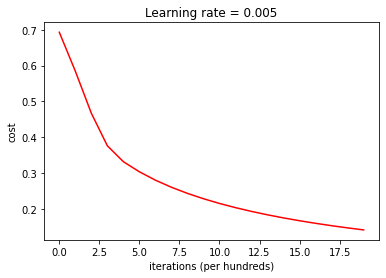

In [39]:
#Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs, color='r')
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Learning rate = ' + str(logistic_regression_model['learning_rate']));

**Choice of learning rate:**

In order for Gradient Descent to work we must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates.

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



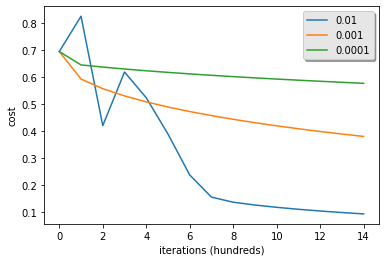

In [41]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ('Training a model with learning rate: ' + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + '-------------------------------------------------------' + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]['costs']), label=str(models[str(lr)]['learning_rate']))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90');

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we should: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting.